<head style = "position:absolute; left:0px" class = "lse_header">
    <div style="width: 15%; float:left; height:100px;">
        <img src = "https://www.dropbox.com/s/mz416p4rrm692ed/lse_logo.png?raw=1" style="width: 100px; height: 35px; float:left; margin-top: 30px">
    </div>
    <div style="width: 70%; float:left; height:100px;">
        <h4 style = "text-align:center;margin-top: 30px;">FM442: Quantitative Methods for Finance and Risk Analysis</h4>
    </div>
    <div style="width: 15%; float:left; height:100px;">
        <p style = "text-align:right;margin-top:30px">Jon Danielsson<br>
    Michaelmas Term 2020</p>
    </div>
</head>

<h1 style = "text-align: center; font-size: 36px">Seminar 2</h1>

In this class we will:  

[1. Install and load packages](#1)    
[2. Basic Data Handling](#2)  
[3. Save created Data Frames](#3)  
[4. Create, customize and export plots](#4)  

___
<a name="1"></a>
## Installing and loading packages

One of the most useful features of R is its large library of packages. Although the base R package is very powerful, there are thousands of community-built packages to perform specific tasks that can save us the effort of programming some things from scratch. The complete list of available R packages can be found here: https://cran.r-project.org.

To install a package, type in the console: `install.packages("name_of_package")`, and after installed, you can load it with: `library(name_of_package)`.

It is considered a good practice to start your .R script with loading all the libraries that will be used in your program.

In the _Information_ pane of RStudio, you can access the list of packages that are installed in your R environment:
<img src = "https://www.dropbox.com/s/bdk8qilwa2yte3g/Screenshot%202020-06-23%20at%2016.28.38.png?raw=1" width = 500px></img>  
By clicking on a package's name, you will see all the information it contains

### Installing some packages we will need for our course

Make sure you have the following packages installed:

`install.packages("zoo")`  
`install.packages("lubridate")`  
`install.packages("tseries")`  
`install.packages("rugarch")`  
`install.packages("rmgarch")`  
`install.packages("reshape2")`  
`install.packages("microbenchmark")`  
`install.packages("car")`

### Loading the packages needed for today

In [2]:
library(reshape2)
library(lubridate)

___
<a name="2"></a>
## Basic Data Handling


The first thing to do when working with new data is cleaning it. Let's load the data downloaded in the previous class and take a look at it:

In [3]:
data <- read.csv("crsp.csv")
head(data)

PERMNO date     TICKER COMNAM         PRC    RET       CFACPR
1 10107  19900102 MSFT   MICROSOFT CORP 88.750  0.020115 144   
2 10107  19900103 MSFT   MICROSOFT CORP 89.250  0.005634 144   
3 10107  19900104 MSFT   MICROSOFT CORP 91.875  0.029412 144   
4 10107  19900105 MSFT   MICROSOFT CORP 89.625 -0.024490 144   
5 10107  19900108 MSFT   MICROSOFT CORP 91.000  0.015342 144   
6 10107  19900109 MSFT   MICROSOFT CORP 90.750 -0.002747 144

The format of this table is a `data.frame`. This is a type of variable that allows us to store data of different nature (numbers, characters, dates, etc.)

In [4]:
class(data)

[1] "data.frame"

We are interested in having a data frame that holds the price of each stock over time, and another one that holds the returns. We will use the current `TICKER` of the stocks as the identifying name for each company. 

Let's start with prices. Before building our data frame, we need to adjust the prices with the Cumulative Factor to Adjust Prices, or `CFACPR`. The reason is that the `PRC` variable does not take into account stock splits, which can lead us to believe that the price of a stock halved in a day, when the reason for this drop is no more than a stock split. To adjust for this, we will divide the column `PRC` by `CFACPR`. For comparison, we will keep the unadjusted prices in a `Unadjusted_PRC`.

In [5]:
# Keeping the unadjusted prices in a new column
data$Unadjusted_PRC <- data$PRC

# Modifying the PRC column
data$PRC <- data$PRC / data$CFACPR

head(data)

PERMNO date     TICKER COMNAM         PRC       RET       CFACPR
1 10107  19900102 MSFT   MICROSOFT CORP 0.6163194  0.020115 144   
2 10107  19900103 MSFT   MICROSOFT CORP 0.6197917  0.005634 144   
3 10107  19900104 MSFT   MICROSOFT CORP 0.6380208  0.029412 144   
4 10107  19900105 MSFT   MICROSOFT CORP 0.6223958 -0.024490 144   
5 10107  19900108 MSFT   MICROSOFT CORP 0.6319444  0.015342 144   
6 10107  19900109 MSFT   MICROSOFT CORP 0.6302083 -0.002747 144   
  Unadjusted_PRC
1 88.750        
2 89.250        
3 91.875        
4 89.625        
5 91.000        
6 90.750

Now that we have the correct prices, we will select the date and price columns for each stock and put them into a variable with the ticker name. Afterwards, we have to rename the price column to the ticker name. For example, for MSFT:

In [6]:
# Getting the date and PRC variables for Microsoft
MSFT <- data[data$PERMNO == 10107, c("date", "PRC")]

# Renaming PRC to MSFT
names(MSFT)[2] <- "MSFT"

# Now we do the same for the five others

XOM <- data[data$PERMNO==11850, c("date", "PRC")]
names(XOM)[2] <- "XOM"

GE <- data[data$PERMNO==12060, c("date", "PRC")]
names(GE)[2] <- "GE"

JPM <- data[data$PERMNO==47896, c("date", "PRC")]
names(JPM)[2] <- "JPM"

INTC <- data[data$PERMNO==59328, c("date", "PRC")]
names(INTC)[2] <- "INTC"

C <- data[data$PERMNO==70519, c("date", "PRC")]
names(C)[2] <- "C"

# And merge all into a single table called PRC using the merge() function
PRC <- merge(MSFT, XOM)
PRC <- merge(PRC, GE)
PRC <- merge(PRC, JPM)
PRC <- merge(PRC, INTC)
PRC <- merge(PRC, C)
head(PRC)

date     MSFT      XOM     GE       JPM      INTC     C       
1 19900102 0.6163194 12.5000 5.562500 10.00000 1.125000 22.87621
2 19900103 0.6197917 12.3750 5.552083 10.33333 1.093750 23.16825
3 19900104 0.6380208 12.2500 5.520833 10.37500 1.117188 22.87621
4 19900105 0.6223958 12.1875 5.468750 10.41667 1.109375 23.07090
5 19900108 0.6319444 12.3750 5.500000 10.41667 1.125000 23.26559
6 19900109 0.6302083 12.1250 5.385417 10.08333 1.156250 22.97356

We got the output we wanted, but it involved several lines of basically copy-pasting the same code. 

As a challenge, you can try to replicate the process using a `for` loop.

Also, we could have saved us this trouble by using a package. R has thousands of packages with functions that can help us easily get the output we are looking for. We are going to create another table using the `dcast` function from the `reshape2` package.

In [7]:
# Remove the previous variable
rm(PRC)

# Create a new data frame 
PRC <- dcast(data, date ~ PERMNO, value.var = "PRC")
names(PRC) <- c("date", "MSFT", "XOM", "GE", "JPM", "INTC", "C")
head(PRC)

date     MSFT      XOM     GE       JPM      INTC     C       
1 19900102 0.6163194 12.5000 5.562500 10.00000 1.125000 22.87621
2 19900103 0.6197917 12.3750 5.552083 10.33333 1.093750 23.16825
3 19900104 0.6380208 12.2500 5.520833 10.37500 1.117188 22.87621
4 19900105 0.6223958 12.1875 5.468750 10.41667 1.109375 23.07090
5 19900108 0.6319444 12.3750 5.500000 10.41667 1.125000 23.26559
6 19900109 0.6302083 12.1250 5.385417 10.08333 1.156250 22.97356

Not only did this save us time and lines of code, but it also gave us as output a `data.frame` object instead of a `matrix`, which is easier to handle.

We can now directly create the data frame for returns:

In [8]:
RET <- dcast(data, date ~ PERMNO, value.var = "RET")
names(RET) <- c("date", "MSFT", "XOM", "GE", "JPM", "INTC", "C")
head(RET)

date     MSFT      XOM       GE        JPM       INTC      C        
1 19900102  0.020115  0.000000  0.034884  0.004184  0.043478  0.030702
2 19900103  0.005634 -0.010000 -0.001873  0.033333 -0.027778  0.012766
3 19900104  0.029412 -0.010101 -0.005629  0.004032  0.021429 -0.012605
4 19900105 -0.024490 -0.005102 -0.009434  0.004016 -0.006993  0.008511
5 19900108  0.015342  0.015385  0.005714  0.000000  0.014085  0.008439
6 19900109 -0.002747 -0.020202 -0.020833 -0.032000  0.027778 -0.012552

### Transforming simple returns to compounded

The returns in our dataset are simple returns, which, as we saw in lectures, are calculated like this:

$$R_{t}=\frac{P_{t} - P_{t-1}}{P_{t-1}}$$

We prefer to work with continuously compounded returns, which are defined as:

$$Y_{t} = \log\left(\frac{P_{t}}{P_{t-1}}\right) = \log\left(1+R_{t}\right)$$


To transform them into compound returns, we should use the `log()` function:


In [9]:
# We choose all the columns except the first one 
# And transform them into a new Y data frame
Y <- log(1 + RET[,2:7])
Y$date <- RET$date
head(Y)

MSFT         XOM         GE           JPM          INTC         C           
1  0.019915366  0.00000000  0.034289343  0.004175271  0.042559364  0.030240123
2  0.005618188 -0.01005034 -0.001874756  0.032789500 -0.028171106  0.012685202
3  0.028987765 -0.01015236 -0.005644903  0.004023893  0.021202627 -0.012685117
4 -0.024794868 -0.00511506 -0.009478782  0.004007957 -0.007017566  0.008474986
5  0.015225502  0.01526785  0.005697737  0.000000000  0.013986728  0.008403591
6 -0.002750780 -0.02040885 -0.021053069 -0.032523192  0.027399190 -0.012631442
  date    
1 19900102
2 19900103
3 19900104
4 19900105
5 19900108
6 19900109

### Date formats

On our `RET` data frame, we have a column for the dates of the observations. R has a special variable type for working with dates called `Date`, which will make our lifes easier when trying to do plots and some analyses. However, by default the date column in our dataset is not in this format:

In [10]:
class(Y$date)

[1] "integer"

There are several ways to transform data into the `Date` type. We will use the package `lubridate` that we installed earlier. In particular, the function `ymd()` that stands for year-month-day. It is a powerful function that will turn any character in that order into a `Date` format. For example, it can handle:

`ymd("20101005")`  
`ymd("2010-10-05")`  
`ymd("2010/10/05")`

Likewise, you could also use `dmy()` or `mdy()` for different formats.

In [11]:
# Use the function ymd() to transform the column into Dates
Y$date <- ymd(Y$date)
# Check if it worked
class(Y$date)

[1] "Date"

In [12]:
# Lets do the same for PRC
PRC$date <- ymd(PRC$date)

___
<a name="3"></a>
## Saving data frames

After handling data, we want to make sure we do not have to do the same procedure every time we open our program. For this, we can easily save the data frame we have created as an `.RData` object that can be loaded the next time we open R. To do so, we need to make sure we are at the Directory where we want to save the data, and use the `save()` function:

In [13]:
# Saving the data frame of returns
save(Y, file = "Y.RData")

# Saving the data frame of prices
save(PRC, file = "PRC.RData")

To load a `.RData` file, we need to use the function `load`:

In [14]:
# Remove the existing data frame of returns
rm(Y)

# Load the saved file
load("Y.RData")
head(Y)

MSFT         XOM         GE           JPM          INTC         C           
1  0.019915366  0.00000000  0.034289343  0.004175271  0.042559364  0.030240123
2  0.005618188 -0.01005034 -0.001874756  0.032789500 -0.028171106  0.012685202
3  0.028987765 -0.01015236 -0.005644903  0.004023893  0.021202627 -0.012685117
4 -0.024794868 -0.00511506 -0.009478782  0.004007957 -0.007017566  0.008474986
5  0.015225502  0.01526785  0.005697737  0.000000000  0.013986728  0.008403591
6 -0.002750780 -0.02040885 -0.021053069 -0.032523192  0.027399190 -0.012631442
  date      
1 1990-01-02
2 1990-01-03
3 1990-01-04
4 1990-01-05
5 1990-01-08
6 1990-01-09

### Saving as .csv

We can also easily save our data frames as a .csv file using the `write.csv()` function:

In [15]:
write.csv(Y, file = "Y.csv")

___
<a name="4"></a>
## Plotting

The base R has an easy to use plot function called `plot()`. In this section we will learn how to customize our plots, add titles, change axis labels, add legends, select types of lines, vary the colors, and create subplots. 

To get an overview of what `plot()` can do, we can check its documentation by:

In [16]:
?plot

### Customizing a plot

We will start plotting the returns for JP Morgan:

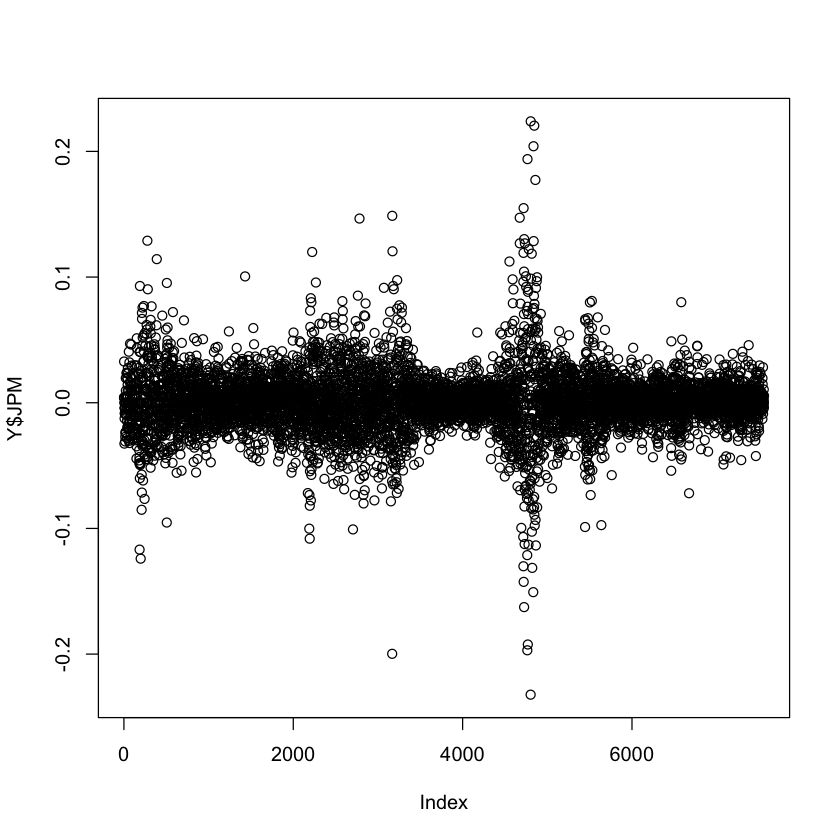

In [17]:
# Simple plot, if we do not specify an X variable, plot() will use an index
plot(Y$JPM)

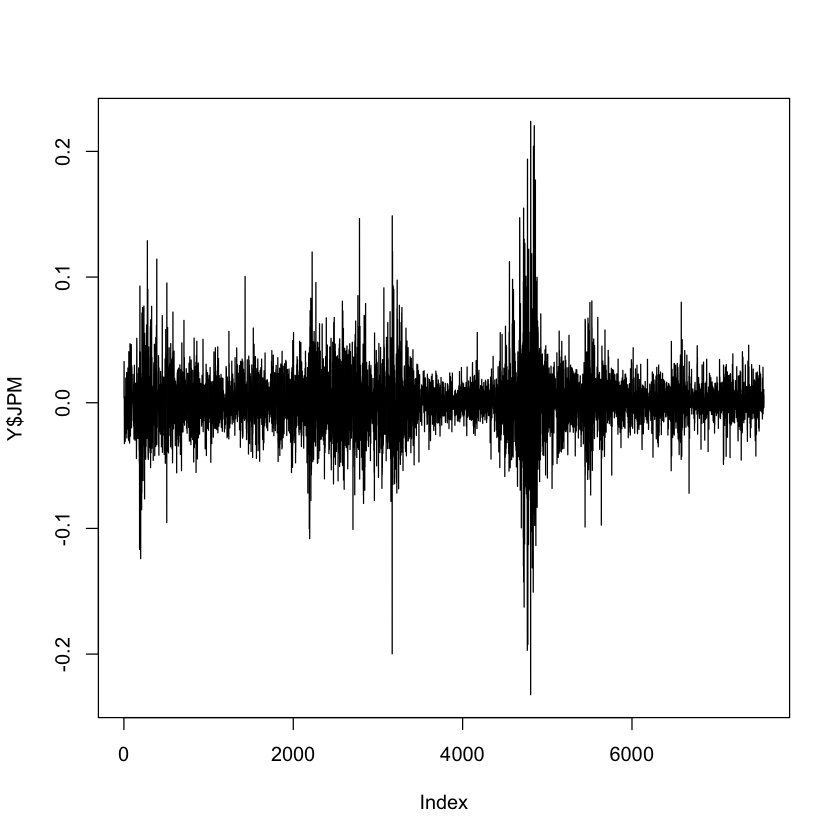

In [20]:
# By default, plot() uses points, we can plot a line with the option "type"
plot(Y$JPM, type = "l")

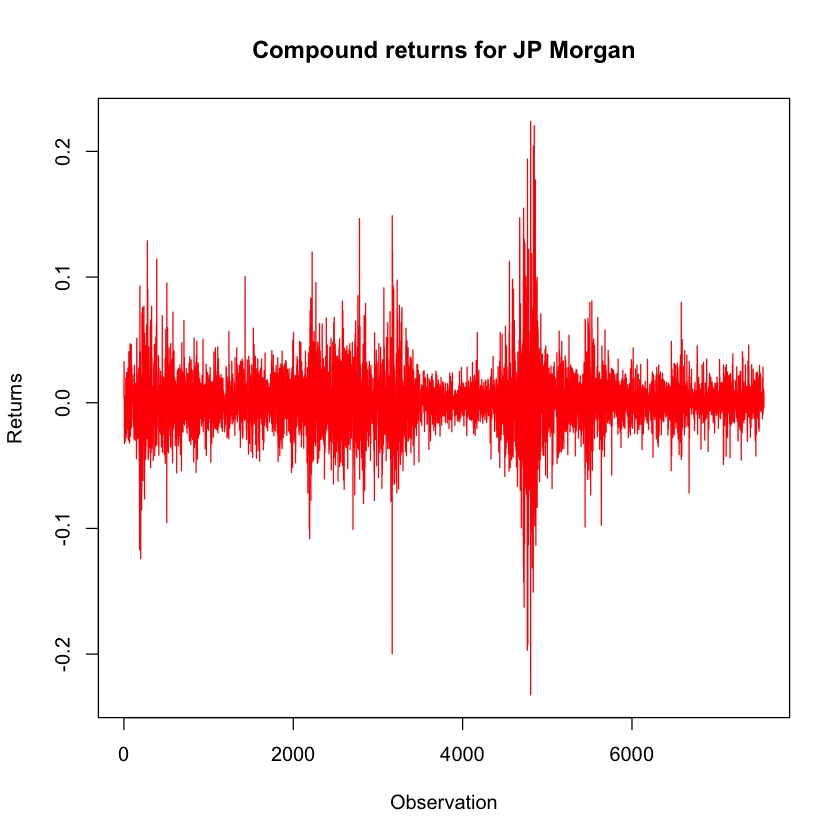

In [21]:
# We can add a title with the option "main"
# Change the axes labels with "xlab" and "ylab"
# Choose a color for the graph with "col"
plot(Y$JPM, type = "l", main = "Compound returns for JP Morgan", 
    ylab = "Returns", xlab = "Observation", col = "red")

We would like to have the dates in the x axis to understand our data better:

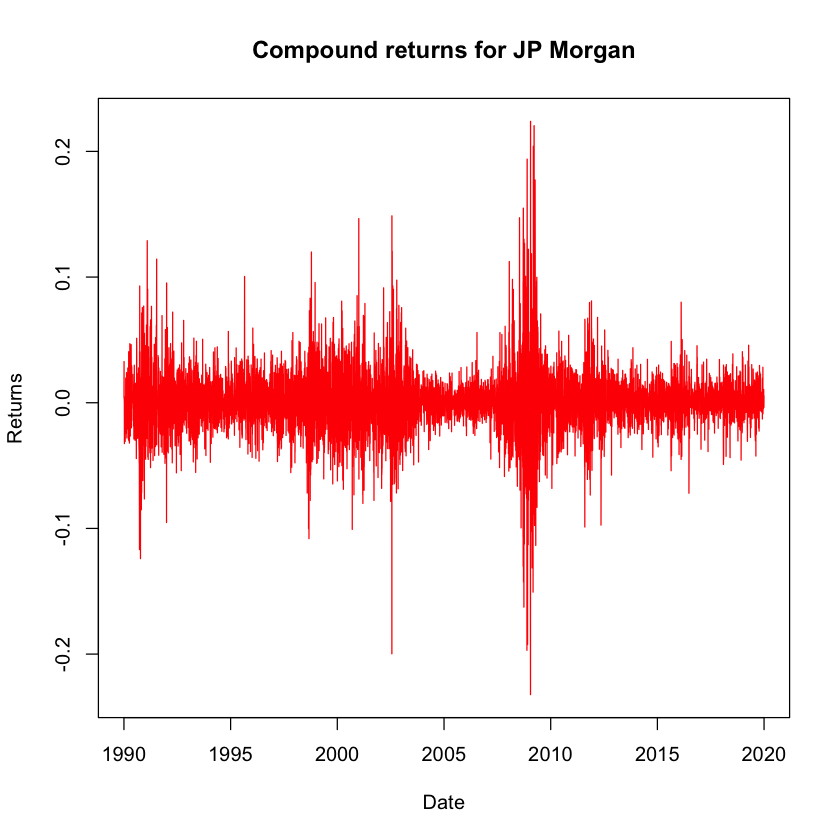

In [22]:
# The first data argument is used as the X variable
plot(Y$date, Y$JPM, type = "l", main = "Compound returns for JP Morgan", 
    ylab = "Returns", xlab = "Date", col = "red")

Also, by using the option `las = 1`, we will make sure that the ticks for the axes are always horizontal. This is a good practice for easier visualization:

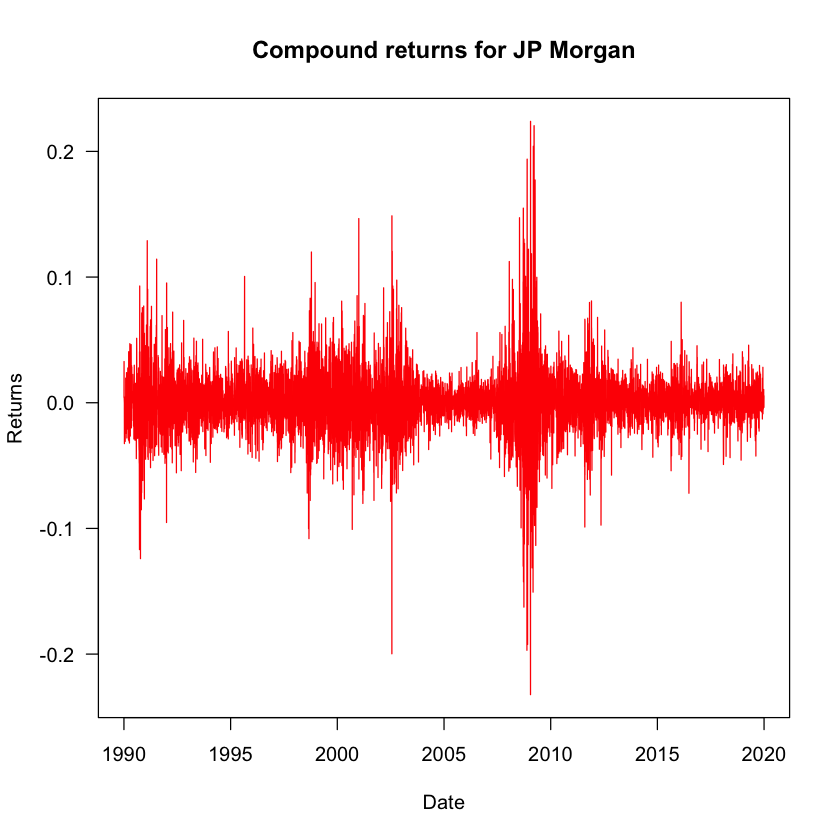

In [23]:
# The first data argument is used as the X variable
plot(Y$date, Y$JPM, type = "l", main = "Compound returns for JP Morgan", 
    ylab = "Returns", xlab = "Date", col = "red", las = 1)

### Visualizing multiple graphs

What if we wanted to plot the prices for JP Morgan and Citi, the two major banks in our dataset?

There are many options to do so. One is to plot both in the same graph, we can achieve this by using the `lines()` function after a plot is created, or using the function `matplot()`:

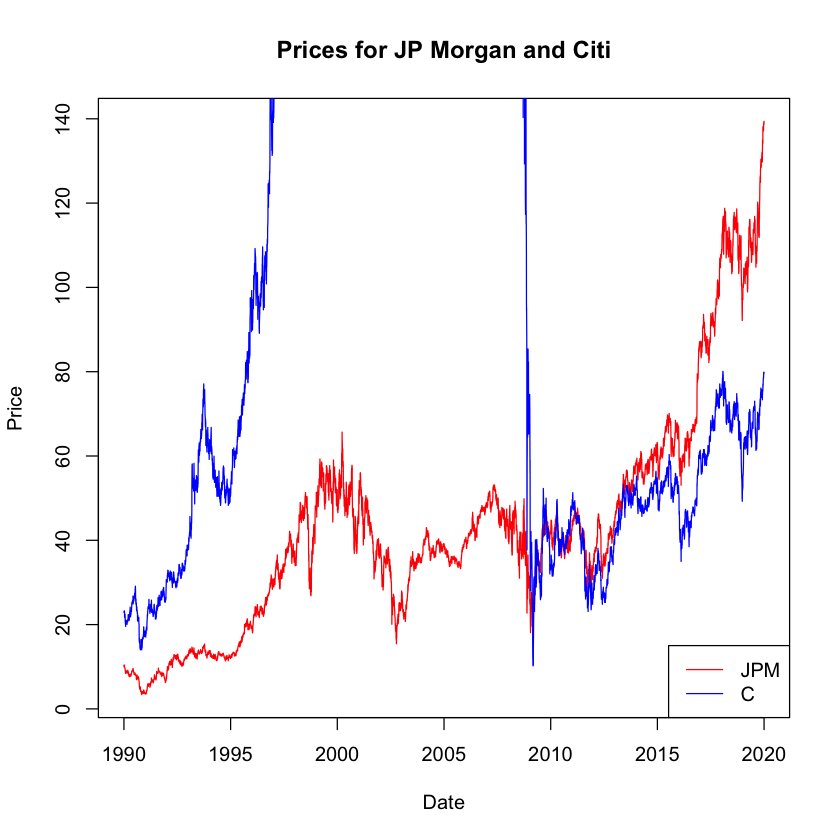

In [24]:
# First we plot the returns of JPM
plot(PRC$date, PRC$JPM, type = "l", main = "Prices for JP Morgan and Citi", 
    ylab = "Price", xlab = "Date", col = "red")

# Then we add the returns of C
lines(PRC$date, PRC$C, col = "blue")

# And we create a legend
legend("bottomright",legend = c("JPM", "C"), col = c("red", "blue"), lty=1)

There is something wrong with this plot. Since we first plotted the prices for JPM, the limits of the plot were determined to fit this data. However, when plotting the prices for C, we see some go below the limits of our plot. We can fix this with the `ylim()` option:

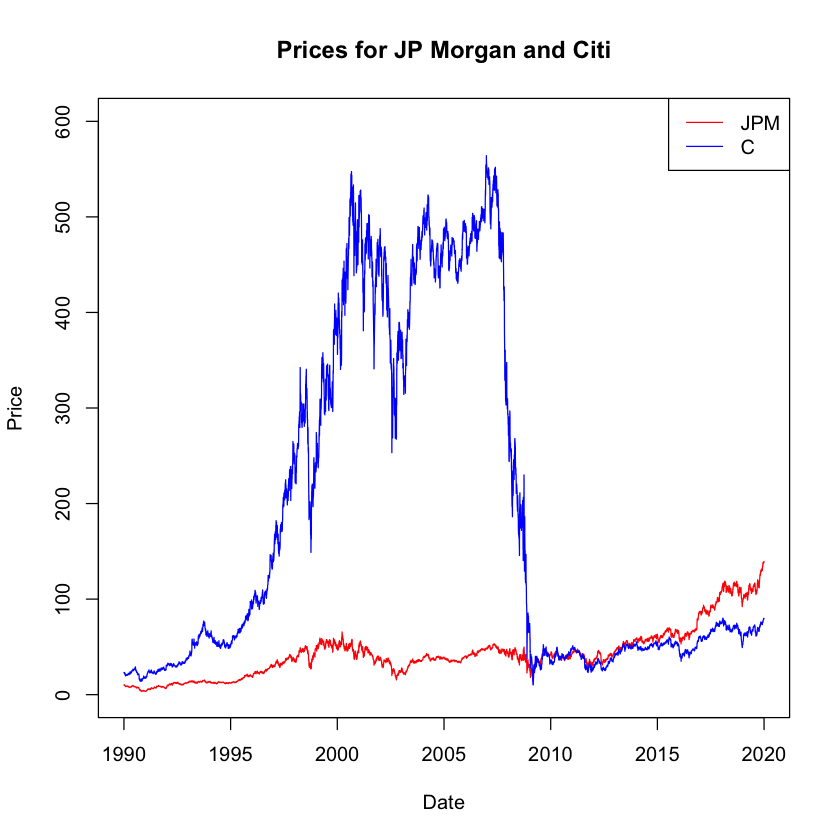

In [25]:
plot(PRC$date, PRC$JPM, type = "l", main = "Prices for JP Morgan and Citi", 
    ylab = "Price", xlab = "Date", col = "red", ylim = c(0, 600))

lines(PRC$date, PRC$C, col = "blue")

legend("topright",legend = c("JPM", "C"), col = c("red", "blue"), lty=1)

Now that we know how to visualize two time series in the same plot, we can do a visual comparison of the adjusted and unadjusted prices for a stock:

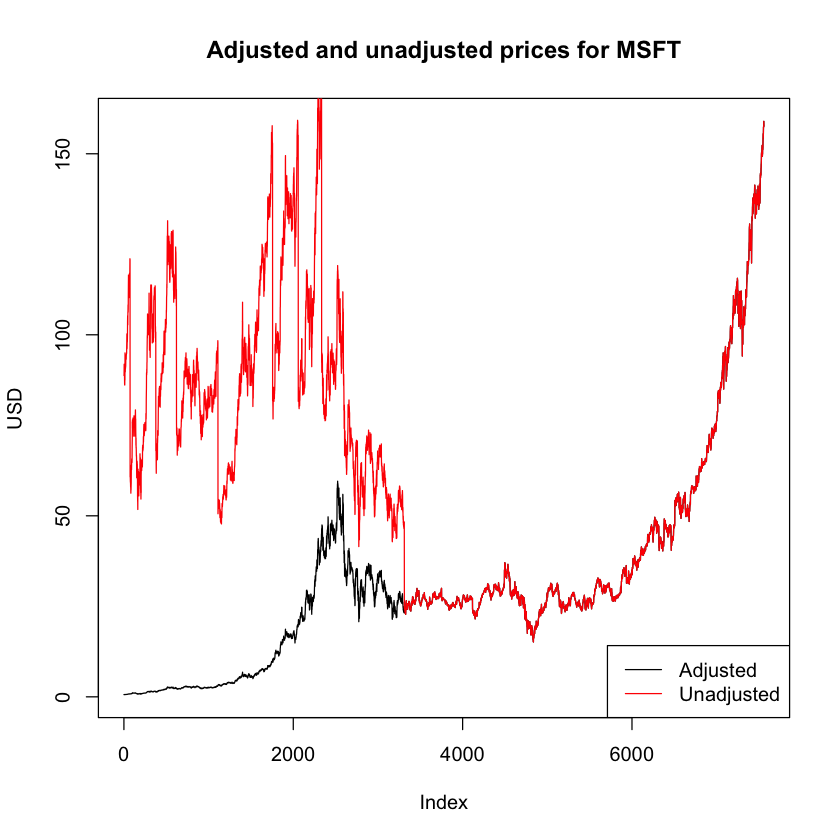

In [26]:
# Extract Microsoft data
msft <- data[data$PERMNO == 10107,]

# Plot the adjusted prices
plot(msft$PRC, type = "l", col = 1, main = "Adjusted and unadjusted prices for MSFT",
    ylab = "USD")

# Plot the unadjusted prices
lines(msft$Unadjusted_PRC, col = 2)

# Adding a legend
legend("bottomright",legend = c("Adjusted", "Unadjusted"), col = c(1:2), lty=1)

The function `matplot()` can be helpful when we want to plot graphs in the same space without worrying of limits:

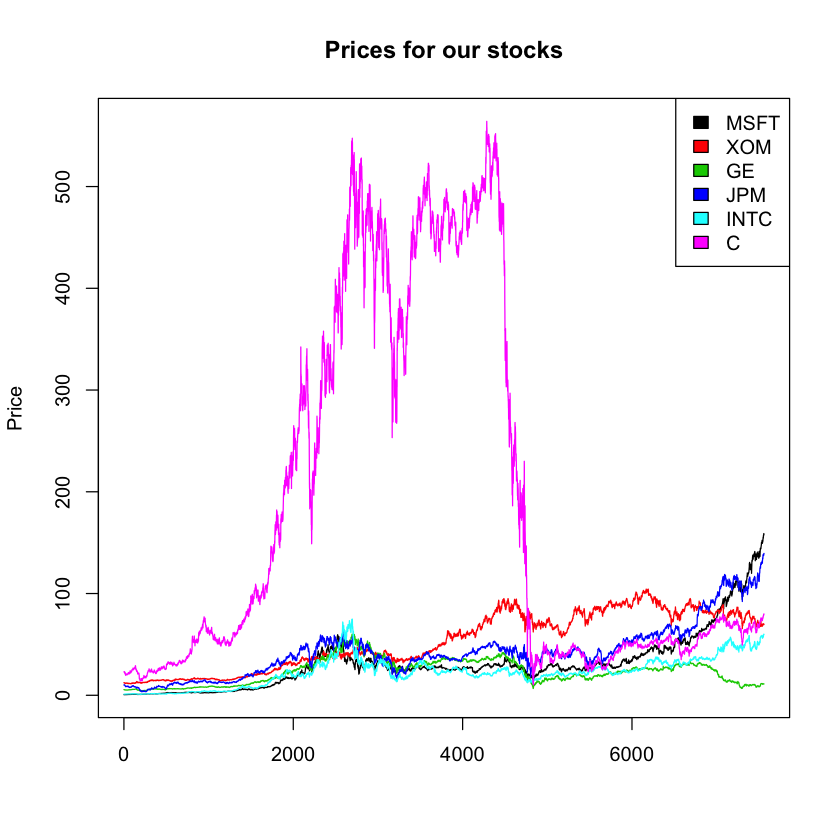

In [27]:
# Plotting all prices
matplot(PRC[,2:7], type = "l", main = "Prices for our stocks", 
    ylab = "Price", lty = 1)

# Adding the legend
legend("topright", legend = names(PRC[,2:7]), col = c(1:6), fil = c(1:6))

In some cases, plotting many time series in the same space can be messy, like if we wanted to plot all returns:

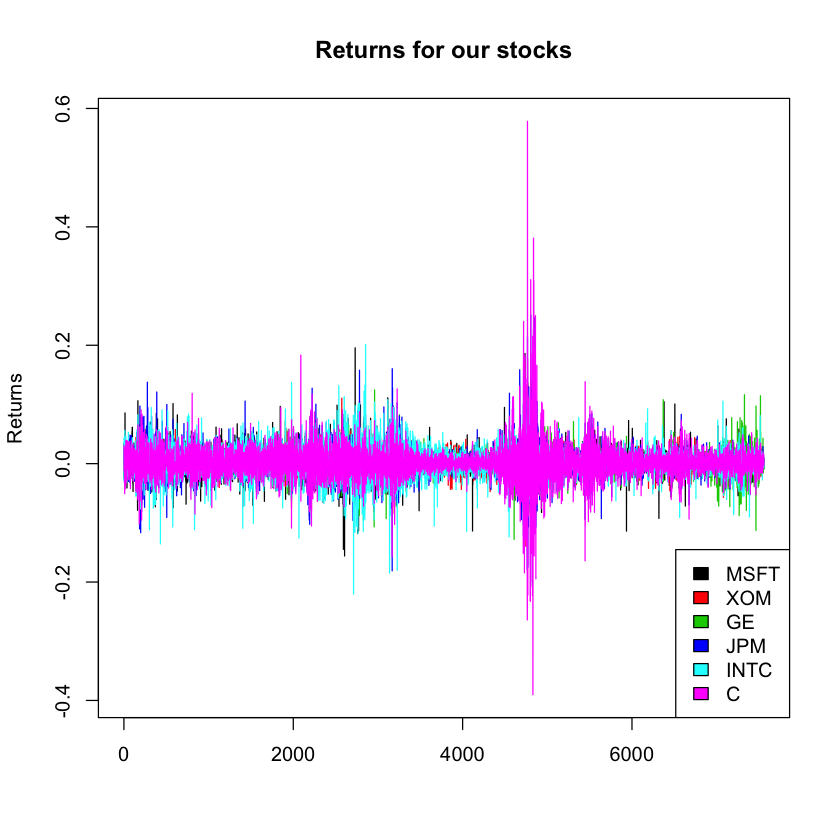

In [28]:
matplot(RET[,2:7], type = "l", main = "Returns for our stocks", 
    ylab = "Returns", lty = 1)

# Adding the legend
legend("bottomright", legend = names(RET[,2:7]), col = c(1:6), fil = c(1:6))

For a better visualization, we will use `par(mfrow = c(a,b))`. This option divides the plotting area into a grid with `a` rows and `b` columns, each which will hold a subplot:

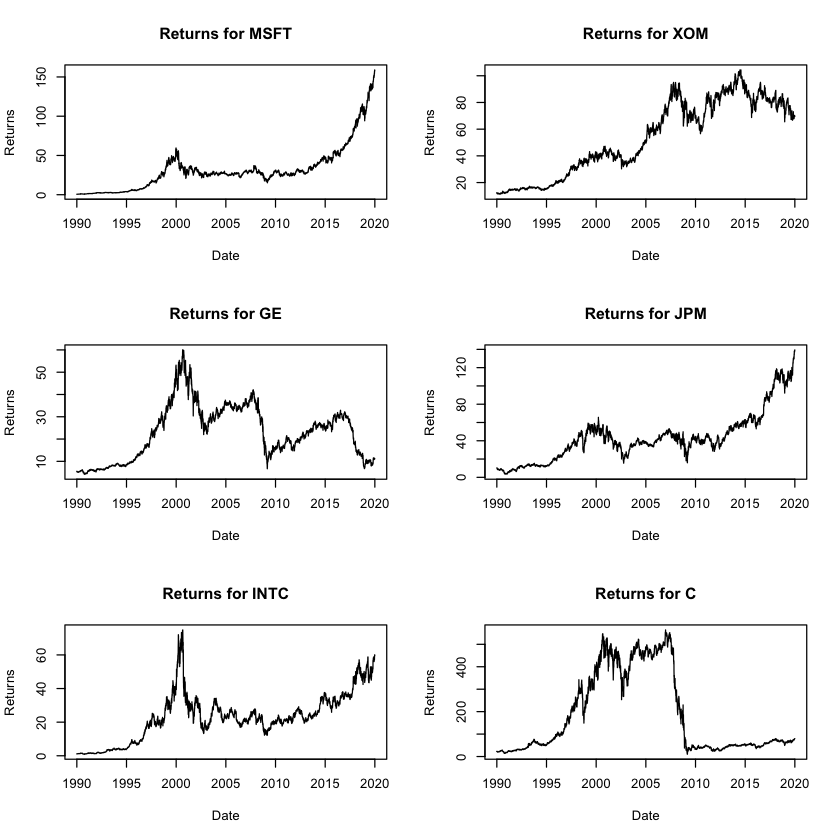

In [29]:
# Divide the space into a 3x2 grid
par(mfrow = c(3,2))

# We will use a FOR loop, which repeats a same piece of code as many times as we indicate
for (i in 2:7) { 
    # The code will be repeated for i = 2, 3, ..., 7
    # In each instance, we will plot the i-th column of PRC
    plot(PRC$date, PRC[,i], type = "l", ylab = "Returns", xlab = "Date",
         main = paste("Returns for", names(PRC)[i]))
}

After using `par(mfrow = c())`, make sure you reset the grid by running `par(mfrow = c(1,1))` or `dev.off()`.

Just for reference, there is a package called `ggplot2`, which is one of the most popular packages for plotting in R, used by a number of organizations like The New York Times or the BBC. For our purposes, the base package has all the functionalities we need, but if you want more information on `ggplot2` you can go [here](http://r-statistics.co/Complete-Ggplot2-Tutorial-Part1-With-R-Code.html).

### Exporting a plot

For this course you will have to create reports that include plots from R. The best way to do that, is to export the plots from RStudio. You can easily do that by clicking on `Export` in the Plot Viewer, and either save the plot, or copy it to your clipboard to paste it in a document. 

## Recap

In this seminar we have covered:

* How to install and load packages
* Create a different column for each stock manually and using a package
* Working with date formats
* Saving data as .RData and .csv 
* Customizing plots with titles, axis labels, colors and axis limits
* Adding legends to plots
* Plotting several time series in the same space
* Creating subplots
* Exporting plots

Some new functions used:

* `library()`
* `merge()`
* `dcast()`
* `log()`
* `ymd()`
* `save()`
* `load()`
* `write.csv()`
* `lines()`
* `legend()`
* `matplot()`
* `par(mfrow = c())`

For more discussion on the material covered in this seminar, refer to _Chapter 1: Financial markets, prices and risk_ on _Financial Risk Forecasting_ by Jon Danielsson.

<small> Acknowledgements: Thanks to Alvaro Aguirre for creating these notebooks</small>  
<small> © Jon Danielsson, 2020 </small>